In [1]:
import os
import scanpy as sc
import pandas as pd

In [2]:
!mkdir -p data
!wget -O data/filtered_feature_bc_matrix.tar.gz https://cf.10xgenomics.com/samples/cell-arc/2.0.0/human_brain_3k/human_brain_3k_filtered_feature_bc_matrix.tar.gz
!cd data; tar -xzf filtered_feature_bc_matrix.tar.gz; cd ..
!wget -O data/cell_data.tsv https://raw.githubusercontent.com/aertslab/pycisTopic/polars/data/cell_data_human_cerebellum.tsv

--2025-09-02 10:24:46--  https://cf.10xgenomics.com/samples/cell-arc/2.0.0/human_brain_3k/human_brain_3k_filtered_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170112442 (162M) [application/x-tar]
Saving to: ‘data/filtered_feature_bc_matrix.tar.gz’

data/filtered_featu 100%[===================>] 162.23M  11.2MB/s    in 15s     

2025-09-02 10:25:02 (10.8 MB/s) - ‘data/filtered_feature_bc_matrix.tar.gz’ saved [170112442/170112442]

--2025-09-02 10:25:04--  https://raw.githubusercontent.com/aertslab/pycisTopic/polars/data/cell_data_human_cerebellum.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

In [3]:
adata = sc.read_10x_mtx(
    "data/filtered_feature_bc_matrix/",
    var_names = "gene_symbols"
)
adata.var_names_make_unique()

In [4]:
cell_data = pd.read_table("data/cell_data.tsv", index_col = 0)
cell_data

,VSN_cell_type,VSN_leiden_res0.3,VSN_leiden_res0.6,VSN_leiden_res0.9,VSN_leiden_res1.2,VSN_sample_id,Seurat_leiden_res0.6,Seurat_leiden_res1.2,Seurat_cell_type
AAACAGCCATTATGCG-1-10x_multiome_brain,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_1 (1),MOL_B_3 (6),10x_multiome_brain,NFOL (1),MOL (1),MOL
AAACCAACATAGACCC-1-10x_multiome_brain,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_3 (5),MOL_B_4 (4),10x_multiome_brain,NFOL (1),NFOL (3),NFOL
AAACCGAAGATGCCTG-1-10x_multiome_brain,INH_VIP,INH_VIP (6),INH_VIP (8),INH_VIP (8),INH_VIP (10),10x_multiome_brain,INH_VIP (7),INH_VIP (6),INH_VIP
AAACCGAAGTTAGCTA-1-10x_multiome_brain,MOL_A,MOL_A (1),MOL_A_2 (1),MOL_A_1 (0),MOL_A_2 (0),10x_multiome_brain,NFOL (1),NFOL (3),NFOL
AAACCGCGTTAGCCAA-1-10x_multiome_brain,MGL,MGL (7),MGL (10),MGL (10),MGL (12),10x_multiome_brain,MGL (8),MGL (9),MGL
...,...,...,...,...,...,...,...,...,...
TTTGTGAAGGGTGAGT-1-10x_multiome_brain,INH_VIP,INH_VIP (6),INH_VIP (8),INH_VIP (8),INH_VIP (10),10x_multiome_brain,INH_SST (5),INH_SST (8),INH_SST
TTTGTGAAGTCAGGCC-1-10x_multiome_brain,AST_CER,AST_CER (2),AST_CER (2),AST_CER (2),AST_CER_1 (7),10x_multiome_brain,BG (2),BG (2),BG
TTTGTGGCATGCTTAG-1-10x_multiome_brain,MOL_B,MOL_B (0),MOL_B_1 (0),MOL_B_1 (1),MOL_B_1 (1),10x_multiome_brain,MOL (0),MOL (1),MOL
TTTGTTGGTGATCAGC-1-10x_multiome_brain,MOL_A,MOL_A (1),MOL_A_2 (1),MOL_A_1 (0),MOL_A_1 (11),10x_multiome_brain,NFOL (1),NFOL (3),NFOL


/home/adrienne/mambaforge/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/adrienne/mambaforge/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


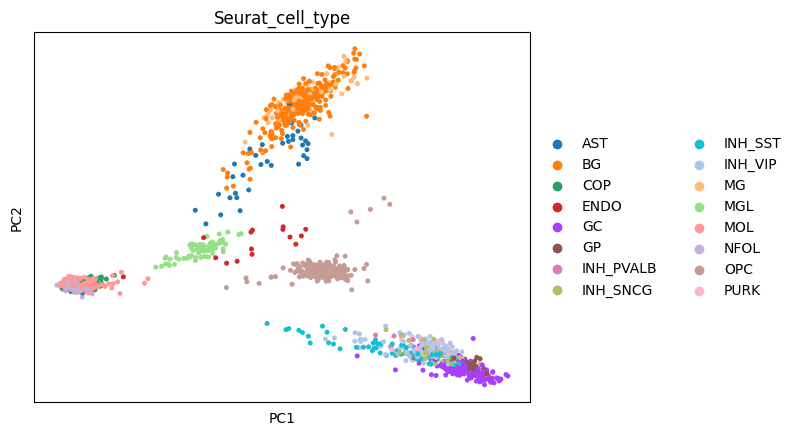

/home/adrienne/mambaforge/envs/scenicplus/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/adrienne/mambaforge/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


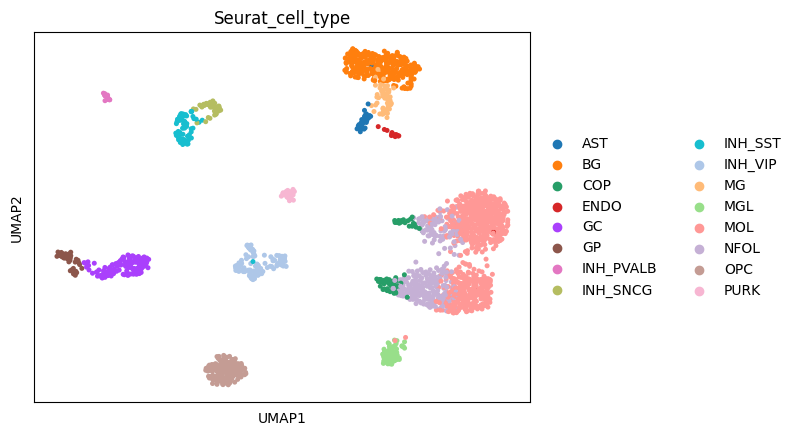

In [5]:
cell_data.index = [cb.rsplit("-", 1)[0] for cb in cell_data.index]
adata = adata[list(set(adata.obs_names) & set(cell_data.index))].copy()
adata.obs = cell_data.loc[adata.obs_names]
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata)
sc.pl.pca(adata, color = "Seurat_cell_type")
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color = "Seurat_cell_type")
adata.write("adata.h5ad")